# Ch 13: Case Study: Data Structure Selection

### Word Frequency Analysis



### Exercise 13-1

Write a program that reads a file, breaks each line into words, strips whitespace and punctuation from the words, and converts them to lowercase. And also build a histogram for the words.

TIP: The function `isletter` tests whether a character is alphabetic.




In [9]:
function processfile(filename)
    hist = Dict()
    for line in eachline(filename)
        processline(line, hist)
    end
    hist
end

function processline(line, hist)
    line = replace(line, '-' => ' ')
    for word in split(line)
#        word = string(filter(isletter, [word...])...)  # scatters... instead of using collect
        word = filter(isletter, word)  # scatters... instead of using collect
        word = lowercase(word)
        hist[word] = get!(hist, word, 0) + 1
    end
end

processline (generic function with 1 method)

In [10]:
test_line = "*** Your command?--Yes.  My Dear; ***"
words = []

test_line = replace(test_line, '-' => ' ')
for word in split(test_line)
    push!(words,filter(isletter, word))
    #word = string(filter(isletter, [word...])...)  # do we really need this for more complicated lines?
end

words

7-element Array{Any,1}:
 ""
 "Your"
 "command"
 "Yes"
 "My"
 "Dear"
 ""

In [11]:
hist = processfile("emma.txt")

Dict{Any,Any} with 7421 entries:
  "prejudices"      => 1
  "practise"        => 3
  "adviser"         => 1
  "forbade"         => 1
  "offend"          => 3
  "quicksighted"    => 1
  "contemplate"     => 1
  "enjoy"           => 9
  "diffuse"         => 1
  "unreserved"      => 1
  "transplantation" => 1
  "fight"           => 1
  "dulness"         => 3
  "everywhere"      => 3
  "exult"           => 1
  "indelicacy"      => 1
  "inattentive"     => 1
  "helping"         => 1
  "whose"           => 39
  "sleepless"       => 1
  "hurried"         => 8
  "gout"            => 1
  "henry"           => 21
  "drawers"         => 1
  "incommoded"      => 2
  ⋮                 => ⋮

`processfile` loops through the lines of the file, passing them one at a time to `processline`. The histogram `hist` is being
used as an accumulator.

`processline` uses the function `replace` to replace hyphens with spaces before using split to break the line into an array of strings. It traverses the array of words and uses `filter`, `isletter` and `lowercase` to remove punctuation and convert to lower case. (It is a shorthand to say that strings are “converted”; remember that strings are immutable, so a
function like lowercase return new strings.)

Finally, `processline` updates the histogram by creating a new item or incrementing an existing one.

### Exercise 13-2

Go to Project Gutenberg (https://gutenberg.org) and download your favorite out-of-copyright book in plain text format. Modify your program from the previous exercise to read the book you downloaded, skip over the header information at the beginning of the file, and process the rest of the words as before. 

For convenience, we will use *Emma* by Jane Austen for our exercises.


Then modify the program to count the total number of words in the book, and the number of times each word is used. Print the number of different words used in the book. Compare different books by different authors, written in different eras. Which author uses the most extensive vocabulary?

In [12]:
function totalwords(hist)
    sum(values(hist))
end

function differentwords(hist)
    length(hist)
end

differentwords (generic function with 1 method)

In [13]:
println("Total number of words: ", totalwords(hist))

Total number of words: 164120


In [14]:
println("Number of different words: ", differentwords(hist))

Number of different words: 7421


### Exercise 13-3

Modify the program from the previous exercise to print the 20 most frequently used words in the book.

In [18]:
function mostcommonV1(hist)
    t = []
    for (key, value) in hist
        push!(t, (value, key))
    end
    #reverse(sort(t))
    sort(t, rev=true)
end

mostcommonV1 (generic function with 1 method)

In [19]:
t = mostcommonV1(hist)
println("The most common words are:")
for (freq, word) in t[1:10]
    println(word, "\t", freq)
end

The most common words are:
the	5380
to	5322
and	4965
of	4412
i	3191
a	3188
it	2544
her	2483
was	2401
she	2365


In [20]:
function mostcommon(hist)
    sorted = sort(collect(hist), by=x->x[2], rev=true)
end

t2 = mostcommon(hist)
println("The most common words are:")
for (word,freq) in t2[1:10]
    println(word, "\t", freq)
end

The most common words are:
the	5380
to	5322
and	4965
of	4412
i	3191
a	3188
it	2544
her	2483
was	2401
she	2365


#### Optional Parameters

We have seen built-in functions that take optional arguments. It is possible to write programmer-defined functions with
optional arguments, too. For example, here is a function that prints the most common words in a histogram:

In [21]:
function printmostcommon(hist, num=10)
    t = mostcommon(hist)
    println("The most common words are: ")
    for (freq, word) in t[1:num]
        println(word, "\t", freq)
    end
end

printmostcommon (generic function with 2 methods)

The first parameter is required; the second is optional. The default value of num is 10.  

If you only provide one argument:

```
printmostcommon(hist)
```

`num` gets the default value. If you provide two arguments:

```
printmostcommon(hist, 20)
```

`num` gets the value of the argument instead. In other words, the optional argument overrides the default value. 

If a function has both required and optional parameters, all the required parameters have to come first, followed by the optional ones.

In [22]:
printmostcommon(hist, 20)

The most common words are: 
5380	the
5322	to
4965	and
4412	of
3191	i
3188	a
2544	it
2483	her
2401	was
2365	she
2246	in
2172	not
2069	you
1995	be
1815	that
1813	he
1626	had
1448	as
1446	but
1373	for


### Dictionary Subtraction

Finding the words from the book that are not in the word list from words.txt is a problem you might recognize as set subtraction; that is, we want to find all the words from one set (the words in the book) that are not in the other (the words
in the list).

`subtract` takes dictionaries `d1` and `d2` and returns a new dictionary that contains all the keys from `d1` that are not in `d2`. Since we don’t really care about the values, we set them all to `nothing`.

In [23]:
function subtract(d1, d2)
    res = Dict()
    for key in keys(d1)
        if key ∉ keys(d2)
            res[key] = nothing
        end
    end
    res
end

subtract (generic function with 1 method)

### Exercise 13-4

Write a program to print all the words in the book that are not in the word list. How many of them are typos? How many of them are common words that should be in the word list, and how many of them are really obscure?

In [24]:
words = processfile("words.txt")
diff = subtract(hist, words)
println("Words in the book that aren't in the word list:")
println(length(keys(diff)))
println("")
for word in keys(diff)
    print(word, "   ")
end

Words in the book that aren't in the word list:
531

outree   quicksighted   outwardly   adelaide   jeffereys   unreserved   dixons   betweens   groundless   jamess   westons   remembrance   unsuccessfully   hawkinss   rencontre   deservedly   favourably   incommoded   unfavourable   wiltshire   bateses   recollecting   recollected   irresistibly   pianoforte   undiscerned   ungraciously   humourist   placidity   swisserland   prosings   constitutions   ult   christian   xvi   outstepped   november   woodhouse   experienced   favourite   neptune   wallises   companionably   tremblings   recollect   httppglaforg   uninterruptedly   gbnewbypglaforg   ein   merchantibility   ing   emma   smallridges   disingenuousness   injustice   admirably   appellation   familiarise   surry   ix   c   ii   xiii   cromer   shakespeare   vii   unconvinced   coxs   tranquillised   complimenter   broadwood   bellas   richardson   dont   doatingly   braithwaites   unimpeded   michaelmas   reanimation   pgla

### Exercise 13-6

Julia provides a data structure called Set that provides many common set operations. You can read about them in Collections and Data Structures, or read the documentation at https://docs.julialang.org/en/v1/base/collections/#Set-Like-Collections-1.

Write a program that uses set subtraction to find words in the book that are not in the word list.

In [25]:
diff_set = setdiff(keys(hist),keys(words))
println("Words in the book that aren't in the word list:")
println(length(diff_set))
println("")
for word in diff_set
    print(word, "   ")
end

Words in the book that aren't in the word list:
531

incommoded   bateses   pianoforte   november   a   authorised   grandmama   f   silversmith   favourable   paradings   x   st   fragrance   hyperbolical   irs   unaccountable   ungraciously   harriets   elizabeth   foolishly   exultingly   goddard   london   iii   june   heartedness   bella   gradations   confederates   ladys   wiltshire   dont   novitiate   administered   delightfully   smilingly   mr   uncouthness   churchills   barnes   l   broadway   wingfield   expediency   agreeably   england   pressingly   soothings   mickleham   unbleached   b   unpersuadable   ak   clara   knightley   th   garricks   incommoding   january   dixon   adelaide   ix   suitableness   email   amor   complaisance   serle   irksomeness   etc   tautology   unmodulated   proportionably   emma   c   tranquillised   disclaimer   destind   electronically   brunswick   online   arrowroot   houseroom   solemnity   latters   inebriety   manchester   untowar

### Random Numbers

Given the same inputs, most computer programs generate the same outputs every time, so they are said to be deterministic.

For some applications, though, we want the computer to be unpredictable. Games are an obvious example, but there are more. Making a program truly nondeterministic turns out to be difficult, but there are ways to make it at least seem nondeterministic. One of them is to use algorithms that generate pseudorandom numbers. Pseudorandom numbers are not truly random because they are generated by a deterministic computation, but just by looking at the numbers it is all but impossible to distinguish them from random. The function rand returns a random float between 0.0 and 1.0 (including 0.0 but not 1.0). Each time you call rand , you get the next number in a long series.

In [26]:
for i in 1:10
    x = rand()
    println(x)
end

0.3372973791212781
0.0781222530443737
0.6446030337138386
0.09714550717036374
0.6290918512006622
0.18968824137093354
0.9646308561271866
0.859097741155616
0.23384774192125724
0.23695937616158091


The function rand can take an iterator or array as argument and returns a random element:

In [27]:
for i in 1:10
    x = rand(1:6)
    print(x, " ")
end

4 3 6 6 5 4 5 5 2 5 

**Exercise 13-5**

Write a function named `choosefromhist` that takes a histogram as defined in Dictionary as a Collection of Counters and
returns a random value from the histogram, chosen with probability in proportion to frequency. For example, for this
histogram:

```
julia> t = ['a', 'a', 'b'];
julia> histogram(t)
Dict{Any,Any} with 2 entries:
'a' => 2
'b' => 1
```

your function should return 'a' with probability 2/3 and 'b' with probability 1/3.

### Random Words

To choose a random word from the histogram, the simplest algorithm is to build an array with multiple copies of each word, according to the observed frequency, and then choose from the array:

In [28]:
function randomword(h)
    t = []
    for (word, freq) in h
        for i in 1:freq
            push!(t, word)
        end
    end
    rand(t)
end

randomword (generic function with 1 method)

This algorithm works, but it is not very efficient; each time you choose a random word, it rebuilds the array, which is as big as the original book. An obvious improvement is to build the array once and then make multiple selections, but the array is still big.

An alternative is:

1. Use keys to get an array of the words in the book.
2. Build an array that contains the cumulative sum of the word frequencies (see Exercise 10-2). The last item in this array is the total number of words in the book, $n$. 
3. Choose a random number from 1 to $n$. Use a bisection search (modify Exercise 10-10) to find the index where the random number would be inserted in the cumulative sum.
4. Use the index to find the corresponding word in the word array.

In [29]:
function inbisect(sorted_array, target)
    
    #@show sorted_array
    a_len = length(sorted_array)
    
    if a_len < 2 
        return sorted_array[1] == target
    end

    halfind = a_len ÷ 2
    half = sorted_array[halfind]
    
    #@show a_len, halfind, half
    if half < target
        inbisect(sorted_array[(halfind+1):end],target)
    else
        inbisect(sorted_array[1:(halfind)],target)
    end
    
end

inbisect (generic function with 1 method)

### Exercise 13-7

Write a program that uses this algorithm to choose a random word from the book.

In [30]:
function inbisect_index(sorted_array, target)
    
    #@show sorted_array
    a_len = length(sorted_array)
    
    if a_len < 2 
        return 1
    end

    halfind = a_len ÷ 2
    half = sorted_array[halfind]
    
    #@show a_len, halfind, half
    if half < target
        return inbisect_index(sorted_array[(halfind+1):end],target)+halfind
    else
        return inbisect_index(sorted_array[1:(halfind)],target)
    end
    
end


function cumulsum(t)
  total = 0
  res = []
  for x in t
    total += x
    push!(res, total)
  end
  res
end

cumulsum (generic function with 1 method)

In [31]:
my_a = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
inbisect_index(my_a, 30),inbisect_index(my_a, 32),inbisect_index(my_a, 37),inbisect_index(my_a, 40),inbisect_index(my_a, 41)

(3, 4, 4, 4, 5)

In [32]:
collect(values(hist));
collect(keys(hist));
freq_cum_sum = cumulsum(collect(values(hist)))
freq_cum_sum[end]

164120

In [33]:
function random_word(hist_input)
    
    words_array = collect(keys(hist_input))
    freq_cum_sum = cumulsum(collect(values(hist_input)))
    
    n = rand(1:freq_cum_sum[end])
      
    index = inbisect_index(freq_cum_sum, n)
   
    @show n, index
    
    return words_array[index]

end

random_word (generic function with 1 method)

In [34]:
random_word(hist)

(n, index) = (53595, 2002)


"are"

### Markov Analysis

If you choose words from the book at random, you can get a sense of the vocabulary, but you probably won’t get a sentence:

```
this the small regard harriet which knightley's it most things
```

A series of random words seldom makes sense because there is no relationship between successive words. For example, in a real sentence you would expect an article like “the” to be followed by an adjective or a noun, and probably not a verb or adverb.

One way to measure these kinds of relationships is Markov analysis, which characterizes, for a given sequence of words, the probability of the words that might come next. For example, the song Eric, the Half a Bee (by Monty Python) begins:

```
Half a bee, philosophically,
Must, ipso facto, half not be.
But half the bee has got to be
Vis a vis, its entity. D’you see?
But can a bee be said to be
Or not to be an entire bee
When half the bee is not a bee
Due to some ancient injury?
```

In this text, the phrase “half the” is always followed by the word “bee”, but the phrase “the bee” might be followed by either “has” or “is”. The result of Markov analysis is a mapping from each prefix (like “half the” and “the bee”) to all possible suffixes (like “has” and “is”). 

Given this mapping, you can generate a random text by starting with any prefix and choosing at random from the possible suffixes. Next, you can combine the end of the prefix and the new suffix to form the next prefix, and repeat. For example, if you start with the prefix “Half a”, then the next word has to be “bee”, because the prefix only appears once in the text. The next prefix is “a bee”, so the next suffix might be “philosophically”, “be” or “due”. In this example the length of the prefix  is always two, but you can do Markov analysis with any prefix length. 

### Exercise 13-8

#### Markov analysis:

1. Write a program to read a text from a file and perform Markov analysis. The result should be a dictionary that maps from prefixes to a collection of possible suffixes. The collection might be an array, tuple, or dictionary; it is up to you to make an appropriate choice. You can test your program with prefix length two, but you should write the program in a way that makes it easy to try other lengths.


2. Add a function to the previous program to generate random text based on the Markov analysis. Here is an example from Emma with prefix length 2:

```
"He was very clever, be it sweetness or be angry, ashamed or only amused, at such a stroke. She had never thought of Hannah till you were never meant for me?" "I cannot make speeches, Emma:" he soon cut it all himself.
```

For this example, I left the punctuation attached to the words. The result is almost syntactically correct, but not quite. Semantically, it almost makes sense, but not quite.

What happens if you increase the prefix length? Does the random text make more sense?

3. Once your program is working, you might want to try a mash-up: if you combine text from two or more books, the random text you generate will blend the vocabulary and phrases from the sources in interesting ways. 

Credit: This case study is based on an example from Kernighan and Pike, The Practice of Programming, Addison-Wesley, 1999.

In [35]:
function Markov_analysis2(filename, num_prefix_words)
 
    mapping = Dict()
    prefixes = []
     
    for line in eachline(filename)
        
        line = replace(line, '-' => ' ')
    
        for word in split(line)    
            
            if length(prefixes) < num_prefix_words
                push!(prefixes, word)
            end
        
            get!(mapping, (prefixes...,), Array{String, 1}())
            push!(mapping[(prefixes...,)], word)
            popfirst!(prefixes)
            push!(prefixes, word)

        end
    
    end
    
    return mapping
    
end

Markov_analysis2 (generic function with 1 method)

In [43]:
eric_map2 = Markov_analysis2("erichalfbee.txt",2)

Dict{Any,Any} with 48 entries:
  ("said", "to")               => ["be"]
  ("can", "a")                 => ["bee"]
  ("see?", "But")              => ["can"]
  ("be", "said")               => ["to"]
  ("be", "an")                 => ["entire"]
  ("ipso", "facto,")           => ["half"]
  ("half", "the")              => ["bee", "bee"]
  ("to", "some")               => ["ancient"]
  ("bee", "Due")               => ["to"]
  ("bee", "When")              => ["half"]
  ("bee,", "philosophically,") => ["Must,"]
  ("has", "got")               => ["to"]
  ("D’you", "see?")            => ["But"]
  ("the", "bee")               => ["has", "is"]
  ("Due", "to")                => ["some"]
  ("an", "entire")             => ["bee"]
  ("got", "to")                => ["be"]
  ("to", "be")                 => ["Vis", "Or", "an"]
  ("is", "not")                => ["a"]
  ("not", "a")                 => ["bee"]
  ("facto,", "half")           => ["not"]
  ("But", "half")              => ["the"]
  ("Or", "not")

In [54]:
eric_map2[("some","ancient")]

1-element Array{String,1}:
 "injury?"

In [37]:
emma_map2 = Markov_analysis2("emma.txt",2)

Dict{Any,Any} with 83960 entries:
  ("quiet", "a")              => ["“Yes,”"]
  ("and", "grace")            => ["of"]
  ("London.", "She")          => ["had"]
  ("points,", "and")          => ["their"]
  ("shall", "both")           => ["have"]
  ("made", "for")             => ["grandpapas.", "the", "him", "_her_."]
  ("a", "done")               => ["thing;"]
  ("no", "habits")            => ["of"]
  ("found", "one")            => ["or"]
  ("I", "agree")              => ["with"]
  ("gave", "you")             => ["pain.", "understanding:", "principles."]
  ("the", "recollection,")    => ["that"]
  ("goodness", "of")          => ["being"]
  ("arm.", "Mr.")             => ["Elton,"]
  ("least", "too")            => ["tall."]
  ("to", "London")            => ["at", "produced", "and", "had", "had"]
  ("there", "too,")           => ["was"]
  ("hand,", "“Hum!")          => ["just"]
  ("a", "thing?")             => ["Mr.", "It", "I"]
  ("neither", "geography")    => ["nor"]
  ("Please", "check"

In [38]:
sort(collect(emma_map2), by = x -> length(x[2]), rev=true)

83960-element Array{Pair{Any,Any},1}:
                ("of", "the") => ["Project", "best", "two", "last", "family,", "actual", "door", "family,", "few", "son"  …  "Project", "Project", "money", "state", "Foundation,", "following", "efforts", "state", "United", "Project"]
                 ("to", "be") => ["cheerful.", "sure.”", "while", "put", "seen.", "only", "settled", "secure", "sure,", "dissuaded"  …  "really", "the", "as", "the", "regretted.", "married.", "concluded", "induced", "bound", "bound"]
                ("in", "the") => ["world", "shape", "house;", "place,", "carriage,", "right,", "world!", "year", "very", "week"  …  "public", "United", "public", "United", "United", "same", "United", "official", "electronic", "U.S."]
                  ("I", "am") => ["sure", "sure", "afraid", "sometimes", "sure", "so", "not", "sure", "sure", "come"  …  "now", "convinced", "particularly", "at", "sure", "sure", "sure", "the", "resolved", "to"]
              ("had", "been") => ["supplied", "l

In [39]:
str = ("test","run","there")
(str[2:end]...,"hi")  # a new tuple that has elements from str[2] to str[end] and a new element

("run", "there", "hi")

In [72]:
function Markov_text_writing(filename, num_prefix_words, num_words)
    
    pre_suf_mapping = Markov_analysis2(filename, num_prefix_words)
    
    n = rand(1:length(pre_suf_mapping))
    
    current_words_tuple = collect(keys(pre_suf_mapping))[n] 
       
    print(join(current_words_tuple, " ") , " ")
    
    for w = 1:num_words - num_prefix_words
        
 #       next_word_list = pre_suf_mapping[current_words_tuple]
        
        next_word_list = get!(pre_suf_mapping, current_words_tuple,collect(values(pre_suf_mapping))[1])
                    # to provision for the last word of the file
        
        m = rand(1:length(next_word_list))
        next_word = next_word_list[m]
        
        print(next_word, " ")
                      
        current_words_tuple = (current_words_tuple[2:end]..., next_word)  # this is a reassignment that creates a new tuple
        
    end
    
end
    

Markov_text_writing (generic function with 1 method)

In [73]:
Markov_text_writing("erichalfbee.txt", 3, 40)

entity. D’you see? But can a bee be said to be Or not to be an entire bee When half the bee has got to be Vis a vis, its entity. D’you see? But can a bee be said to 

In [74]:
Markov_text_writing("emma.txt", 2, 50)

Her observation had been so little knowledge as seemed terribly like a sensible man,” replied Emma, “and a very old and intimate friend of Mr. Weston's hint. “Why, to be treated rather as winter than summer. We had great faults, faults of inconsideration and thoughtlessness; and I can pronounce his 

In [75]:
Markov_text_writing("emma.txt", 3, 50)

here. I wish I were. I will answer for the gentleman's indifference.” She spoke with a very good young man, and a very proper, handsome letter it was. She shewed it to me. I will hear whatever you like. I will tell you. M. and A. Em ma. Do you 

In [76]:
Markov_text_writing("emma.txt", 2, 100)

Perry says that colds have been from jealousy. In Jane's eyes she had little to do.” “I thank you; but it had been pulling about! I never have.” He listened with much self contentment, totally unsuspicious of his journey; and she had been half a minute. They did as they were to be afraid of his being fond of connecting themselves with a much better than to be disturbed by it. A very little to you, Mrs. Weston, and of fancying what the chief of even Emma's vexation. The day approached, the day before, to the Coles. The visit afforded 

### Data Structures

Using Markov analysis to generate random text is fun, but there is also a point to this exercise: data structure selection. In your solution to the previous exercises, you had to choose:

How to represent the prefixes.
How to represent the collection of possible suffixes.
How to represent the mapping from each prefix to the collection of possible suffixes.

The last one is easy: a dictionary is the obvious choice for a mapping from keys to corresponding values.

For the prefixes, the most obvious options are string, array of strings, or tuple of strings.

For the suffixes, one option is an array; another is a histogram (dictionary).

How should you choose? The first step is to think about the operations you will need to implement for each data structure.

For the prefixes, we need to be able to remove words from the beginning and add to the end. For example, if the current prefix is “Half a”, and the next word is “bee”, you need to be able to form the next prefix, “a bee”. Your first choice might be an array, since it is easy to add and remove elements.

For the collection of suffixes, the operations we need to perform include adding a new suffix (or increasing the frequency of an existing one), and choosing a random suffix. Adding a new suffix is equally easy for the array implementation or the histogram. 

Choosing a random element from an array is easy; choosing from a histogram is harder to do efficiently (see Exercise 13-7). 

So far we have been talking mostly about ease of implementation, but there are other factors to consider in choosing data structures. 

One is run time. Sometimes there is a theoretical reason to expect one data structure to be faster than other; for example, I mentioned that the in operator is faster for dictionaries than for arrays, at least when the number of elements is large.

But often you don’t know ahead of time which implementation will be faster. One option is to implement both of them and see which is better. This approach is called benchmarking. A practical alternative is to choose the data structure that is easiest to implement, and then see if it is fast enough for the intended application. If so, there is no need to go on. If not, there are tools, like the Profile module, that can identify the places in a program that take the most time. 

The other factor to consider is storage space. For example, using a histogram for the collection of suffixes might take less space because you only have to store each word once, no matter how many times it appears in the text. In some cases, saving space can also make your program run faster, and in the extreme, your program might not run at all if you run out of memory. But for many applications, space is a secondary consideration after run time.

One final thought: in this discussion, we have implied that we should use one data structure for both analysis and generation.
But since these are separate phases, it would also be possible to use one structure for analysis and then convert to another
structure for generation. This would be a net win if the time saved during generation exceeded the time spent in
conversion.

### Debugging

When you are debugging a program, and especially if you are working on a hard bug, there are five things to try:

* Reading

Examine your code, read it back to yourself, and check that it says what you meant to say.

* Running

Experiment by making changes and running different versions. Often if you display the right thing at the right place in the program, the problem becomes obvious, but sometimes you have to build scaffolding.

* Ruminating

Take some time to think! What kind of error is it: syntax, runtime, or semantic? What information can you get from the error messages, or from the output of the program? What kind of error could cause the problem you’re seeing? What did you change last, before the problem appeared?

* Rubberducking

If you explain the problem to someone else, you sometimes find the answer before you finish asking the question. Often you don’t need the other person; you could just talk to a rubber duck. And that’s the origin of the well-known strategy called rubber duck debugging. I am not making this up; see https://en.wikipedia.org/wiki/Rubber_duck_debugging.

* Retreating

At some point, the best thing to do is back off, undoing recent changes, until you get back to a program that works and that you understand. Then you can start rebuilding.

Beginning programmers sometimes get stuck on one of these activities and forget the others. Each activity comes with its own failure mode.

For example, reading your code might help if the problem is a typographical error, but not if the problem is a conceptual misunderstanding. If you don’t understand what your program does, you can read it 100 times and never see the error, because the error is in your head.

Running experiments can help, especially if you run small, simple tests. But if you run experiments without thinking or reading your code, you might fall into a pattern I call “random walk programming”, which is the process of making random changes until the program does the right thing. Needless to say, random walk programming can take a long time. 

You have to take time to think. Debugging is like an experimental science. You should have at least one hypothesis about what the problem is. If there are two or more possibilities, try to think of a test that would eliminate one of them.

But even the best debugging techniques will fail if there are too many errors, or if the code you are trying to fix is too big and complicated. Sometimes the best option is to retreat, simplifying the program until you get to something that works and that you understand.

Beginning programmers are often reluctant to retreat because they can’t stand to delete a line of code (even if it’s wrong). If it makes you feel better, copy your program into another file before you start stripping it down. Then you can copy the pieces back one at a time.

Finding a hard bug requires reading, running, ruminating, and sometimes retreating. If you get stuck on one of these activities, try the others.

### Exercise 13-9

The “rank” of a word is its position in an array of words sorted by frequency: the most common word has rank 1, the second most common has rank 2, etc.

Zipf’s law describes a relationship between the ranks and frequencies of words in natural languages (https://en.wikipedia.org/wiki/Zipf's_law). Specifically, it predicts that the frequency, $f$, of the word with rank $r$ is:

$$f = cr^{−s}$$

where $c$ and $s$ are parameters that depend on the language and the text. If you take the logarithm of both sides of this
equation, you get:

$$\log{f} = \log{c}−s \log{r}$$

So if you plot $\log{f}$ versus $\log{r}$, you should get a straight line with slope $-s$ and intercept $\log{c}$. 

Write a program that reads a text from a file, counts word frequencies, and prints one line for each word, in descending order of frequency, with $\log{f}$ and $\log{r}$.

Use the `Plots` library to plot the results and check whether they form a straight line.

In [49]:
function zipf(hist)
    t = []
    for (key, value) in hist
        push!(t, (value, key))
    end
    #reverse(sort(t))
    t_sorted = sort(t, rev=true)
    
    x=[]
    y=[]
    for i in eachindex(t_sorted)
        (freq, word) = t_sorted[i]
        push!(x, log(i))
        push!(y, log(freq))
#        println("$word, $(log(freq)), $(log(i))")
    end
    
    plot(x,y, label="Zipf")
    
end


zipf (generic function with 1 method)

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


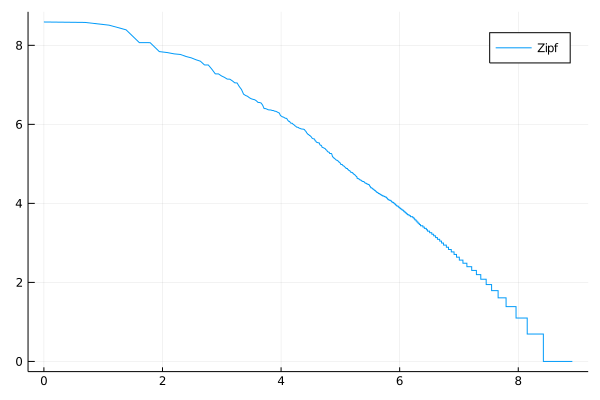

In [50]:
using Plots

emma_hist = processfile("emma.txt")
zipf(emma_hist)